In [21]:
!pip install tensorflow numpy

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [23]:
# Fungsi untuk memuat gambar dari folder
def load_images_from_folder(folder, target_size=(128, 128)):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = load_img(img_path, target_size=target_size, color_mode="grayscale")
            img = img_to_array(img)
            images.append(img)
    return np.array(images)

In [24]:
# Menentukan model autoencoder
def build_autoencoder(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    # Output
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    # Membuat model
    autoencoder = models.Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder

In [25]:
# Menampilkan gambar input, output yang diharapkan, dan output yang diprediksi
def display_images(original, expected, predicted, index):
    plt.figure(figsize=(10, 3))

    # Gambar Input
    plt.subplot(1, 3, 1)
    plt.imshow(original[index].squeeze(), cmap='gray')
    plt.title("Input Image")

    # Gambar Output yang Diharapkan
    plt.subplot(1, 3, 2)
    plt.imshow(expected[index].squeeze(), cmap='gray')
    plt.title("Expected Output")

    # Gambar Output Prediksi
    plt.subplot(1, 3, 3)
    plt.imshow(predicted[index].squeeze(), cmap='gray')
    plt.title("Predicted Output")

    plt.show()

In [33]:
# Path ke folder citra input dan output
input_folder = "/content/drive/MyDrive/code/Deep Learning/Tugas Autoencoder/Input Images"
output_folder = "/content/drive/MyDrive/code/Deep Learning/Tugas Autoencoder/Output Images"

In [34]:
# Memuat dataset input dan output
input_images = load_images_from_folder(input_folder)
output_images = load_images_from_folder(output_folder)

if len(input_images) == 0 or len(output_images) == 0:
    print("Error: No images loaded. Please check the folder paths and ensure they contain images.")
    print(f"Number of input images loaded: {len(input_images)}")
    print(f"Number of output images loaded: {len(output_images)}")

In [35]:
# Normalisasi gambar agar berada dalam rentang [0, 1]
input_images = input_images.astype("float32") / 255.0
output_images = output_images.astype("float32") / 255.0

In [36]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(input_images, output_images, test_size=0.2, random_state=42)

In [37]:
# Membangun model autoencoder
input_shape = X_train.shape[1:]  # Ukuran gambar input
autoencoder = build_autoencoder(input_shape)

In [38]:
# Melatih model
autoencoder.fit(X_train, Y_train, epochs=50, batch_size=4, validation_data=(X_test, Y_test))
# Menyimpan model
autoencoder.save("autoencoder_model.h5")
# Menampilkan beberapa hasil prediksi
decoded_images = autoencoder.predict(X_test)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 400ms/step - loss: 0.0939 - val_loss: 0.0750
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 289ms/step - loss: 0.0785 - val_loss: 0.0737
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step - loss: 0.0612 - val_loss: 0.1583
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 500ms/step - loss: 0.0865 - val_loss: 0.0959
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 427ms/step - loss: 0.0719 - val_loss: 0.1046
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - loss: 0.0781 - val_loss: 0.0482
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step - loss: 0.0417 - val_loss: 0.0383
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - loss: 0.0353 - val_loss: 0.0336
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step - loss: 0.0330 - val_loss: 0.0281
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 301ms/step - loss: 0.0289 - val_loss: 0.0241
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 413ms/step - loss: 0.0234 - val_loss: 0.0189
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 476ms/step - loss: 0.0185 - val_lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


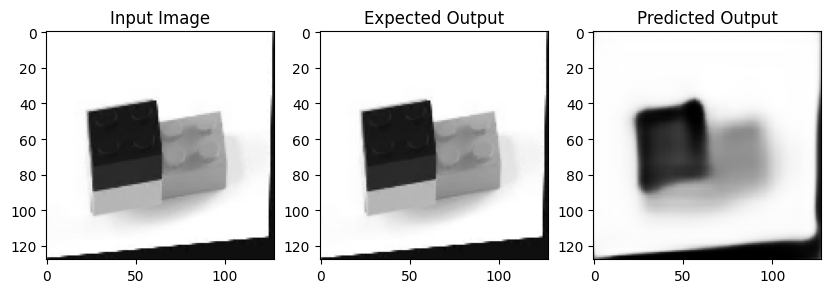

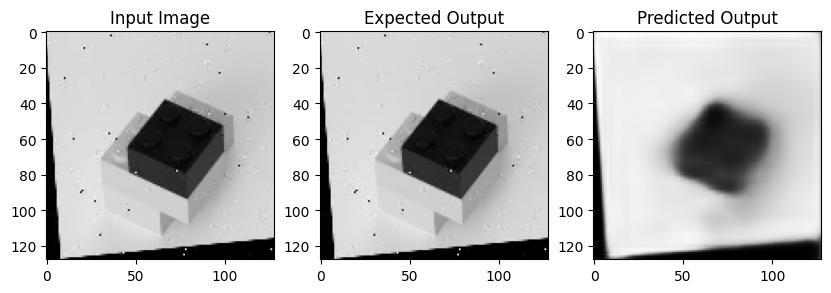

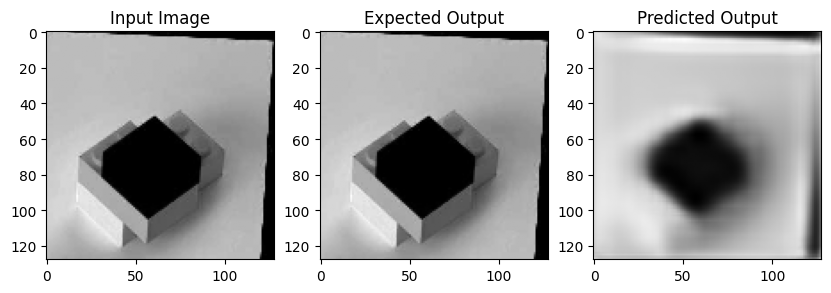

In [39]:
# Tampilkan beberapa hasil prediksi
for i in range(3):
    display_images(X_test, Y_test, decoded_images, i)